<a href="https://colab.research.google.com/github/abdrehman1435/Face-Mask-Detector/blob/main/FaceMask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training a YOLOv8 model on a custom dataset.


In [ ]:
!nvidia-smi


Wed Sep 20 13:39:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip install IPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.3 MB/s eta 0:00:00


In [ ]:
from IPython.display import display, Image

In [ ]:
!pip install ultralytics



import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.0.183 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BymU9OAv2RWdp4i3lLIs")
project = rf.workspace("people-counter-aa0us").project("face-masks-detector")
dataset = project.version(1).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Successfully uninstalled 

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.182, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Face-Masks-Detector-1 in yolov8:: 100%|██████████| 4394/4394 [00:00<00:00, 5171.44it/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Face_Mask/Face_masks/

/content/drive/MyDrive/Face_Mask/Face_masks


In [ ]:
!ls

data.yaml	    README.roboflow.txt  test	Untitled1.ipynb  yolov8s.pt
README.dataset.txt  runs		 train	valid


In [ ]:
from ultralytics import YOLO

In [ ]:
CUDA_LAUNCH_BLOCKING=1.

In [ ]:

%cd /content/drive/MyDrive/Face_Mask/Face_masks
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=640 plots=True

/content/drive/MyDrive/Face_Mask/Face_masks
Ultralytics YOLOv8.0.183 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torc

Display the training results.

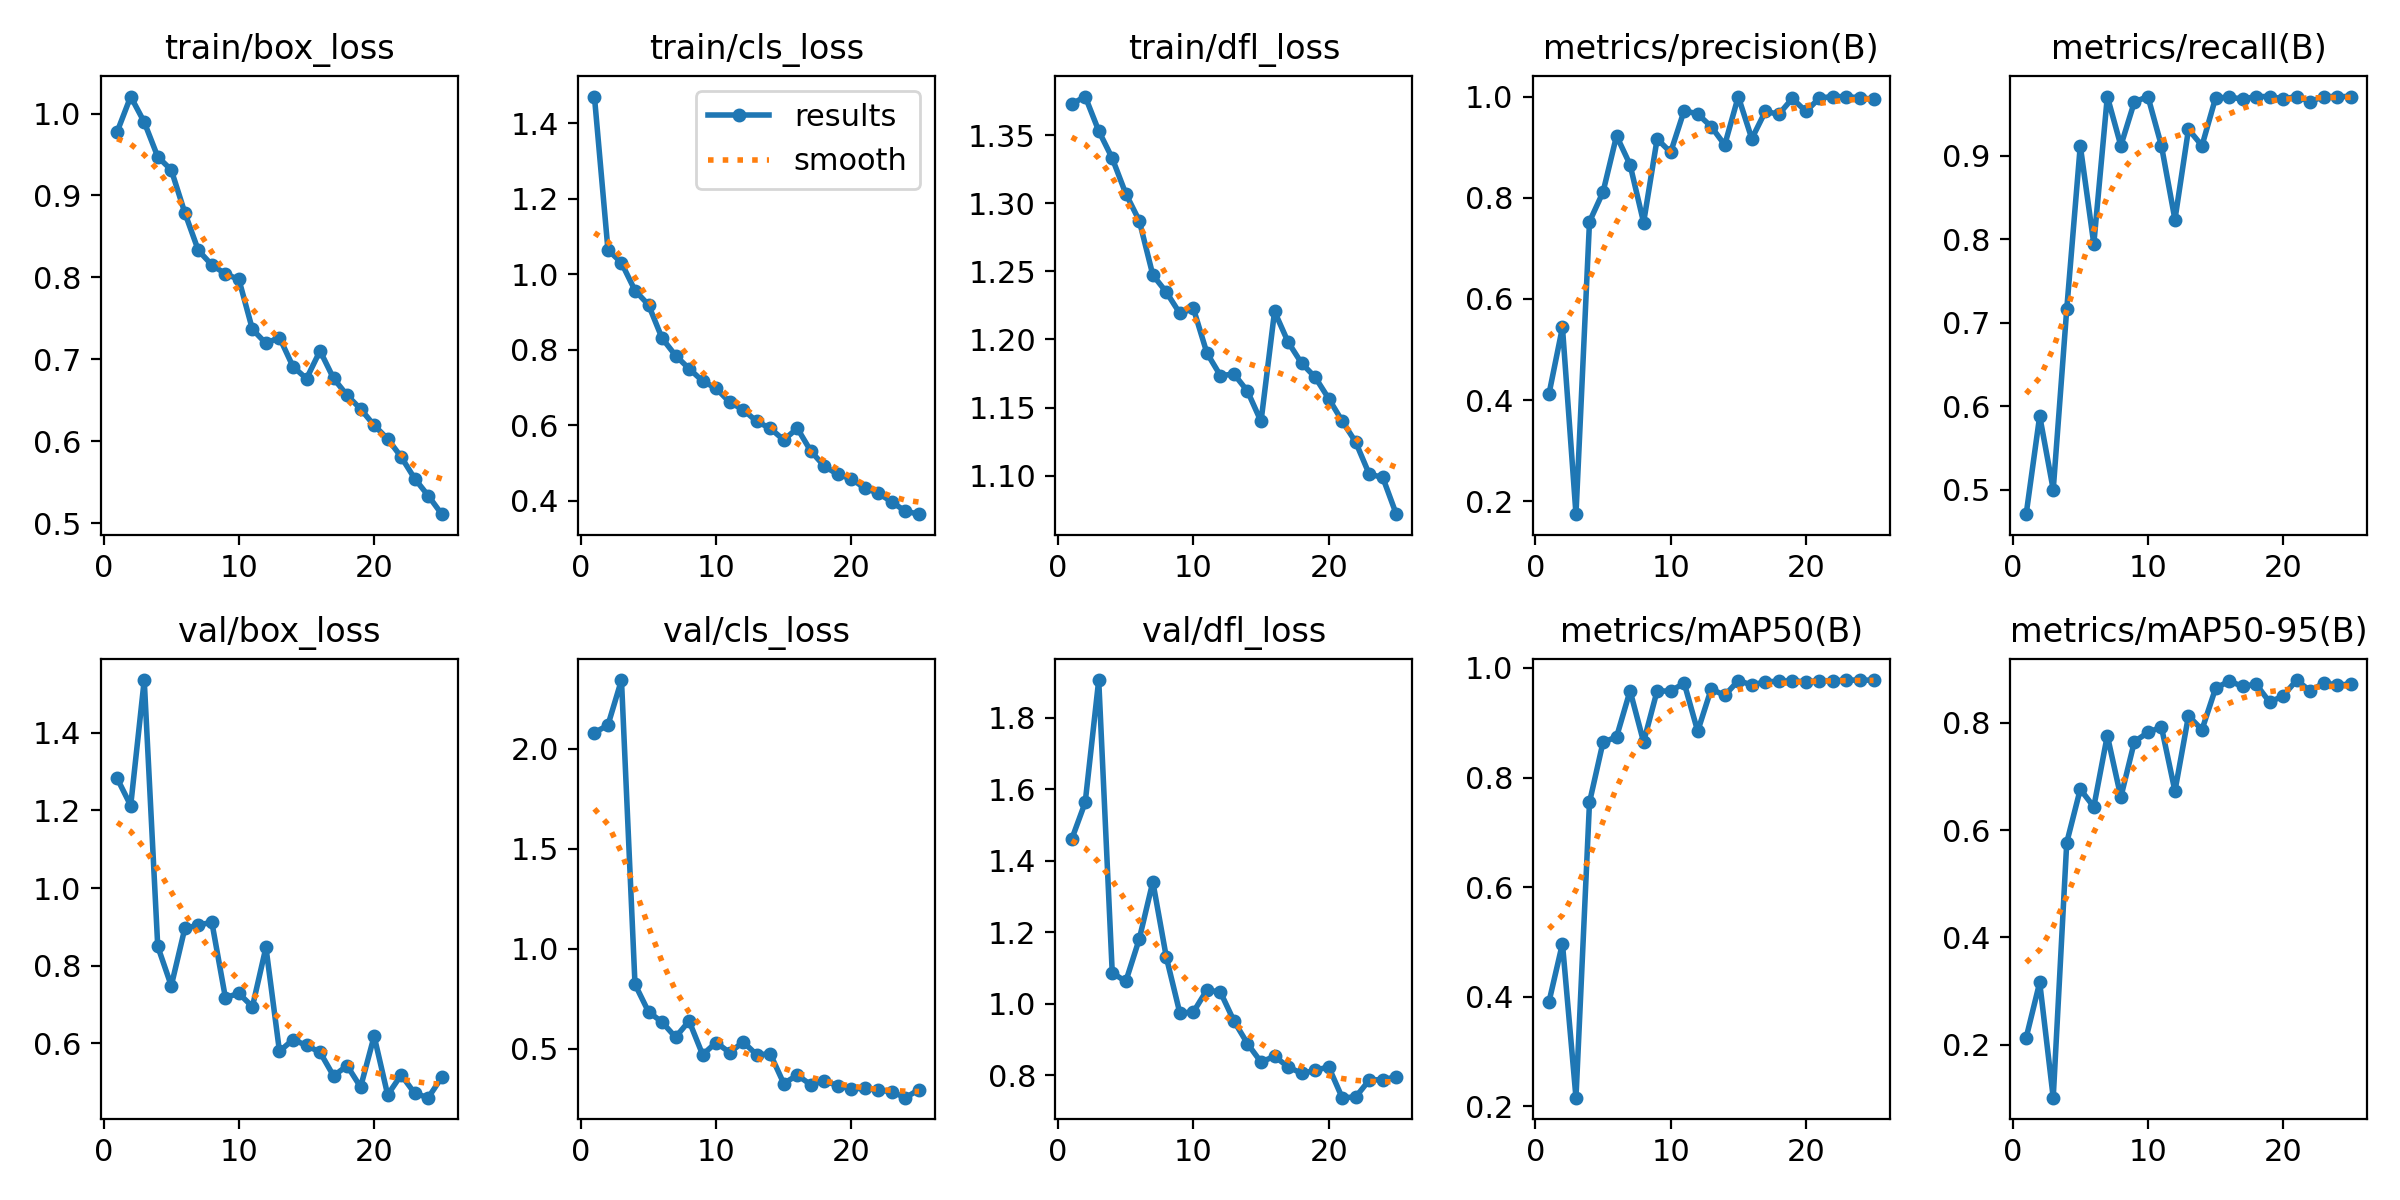

In [ ]:
Image(filename='runs/detect/train4/results.png', width=600)

Display the confusion matrix

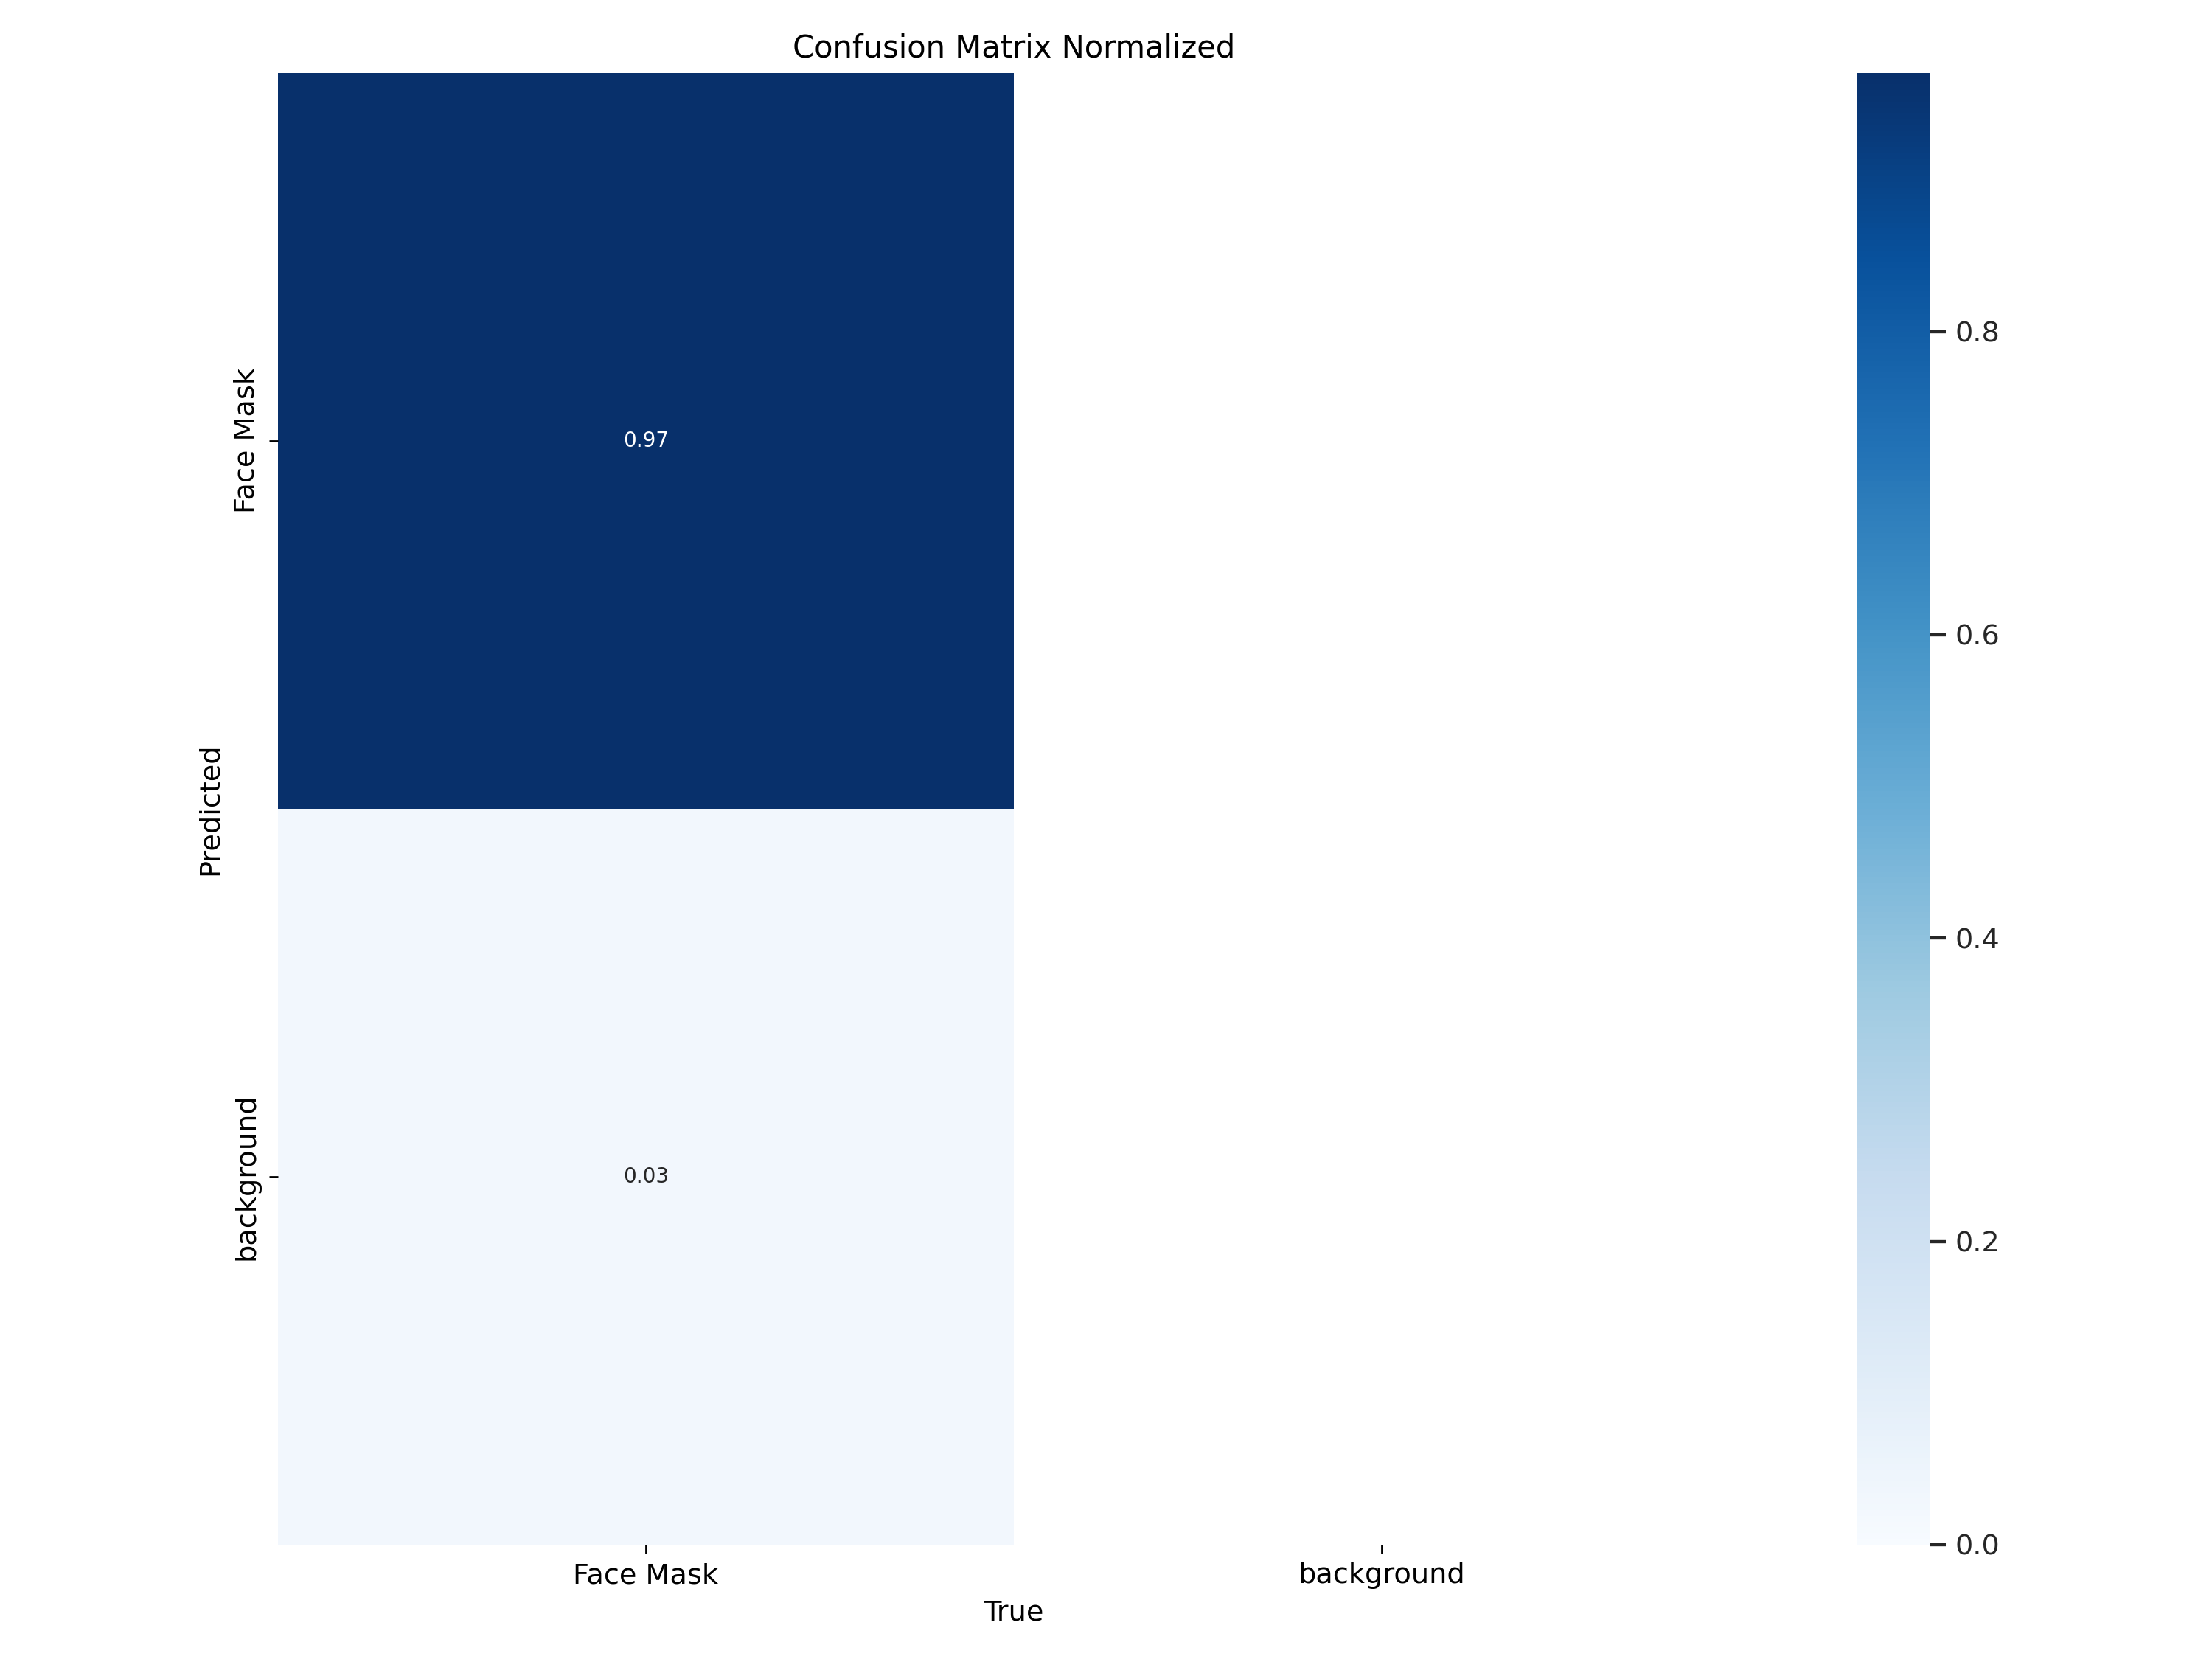

In [ ]:
Image(filename='/content/drive/MyDrive/Face_Mask/Face_masks/runs/detect/train4/confusion_matrix_normalized.png' , width=600)

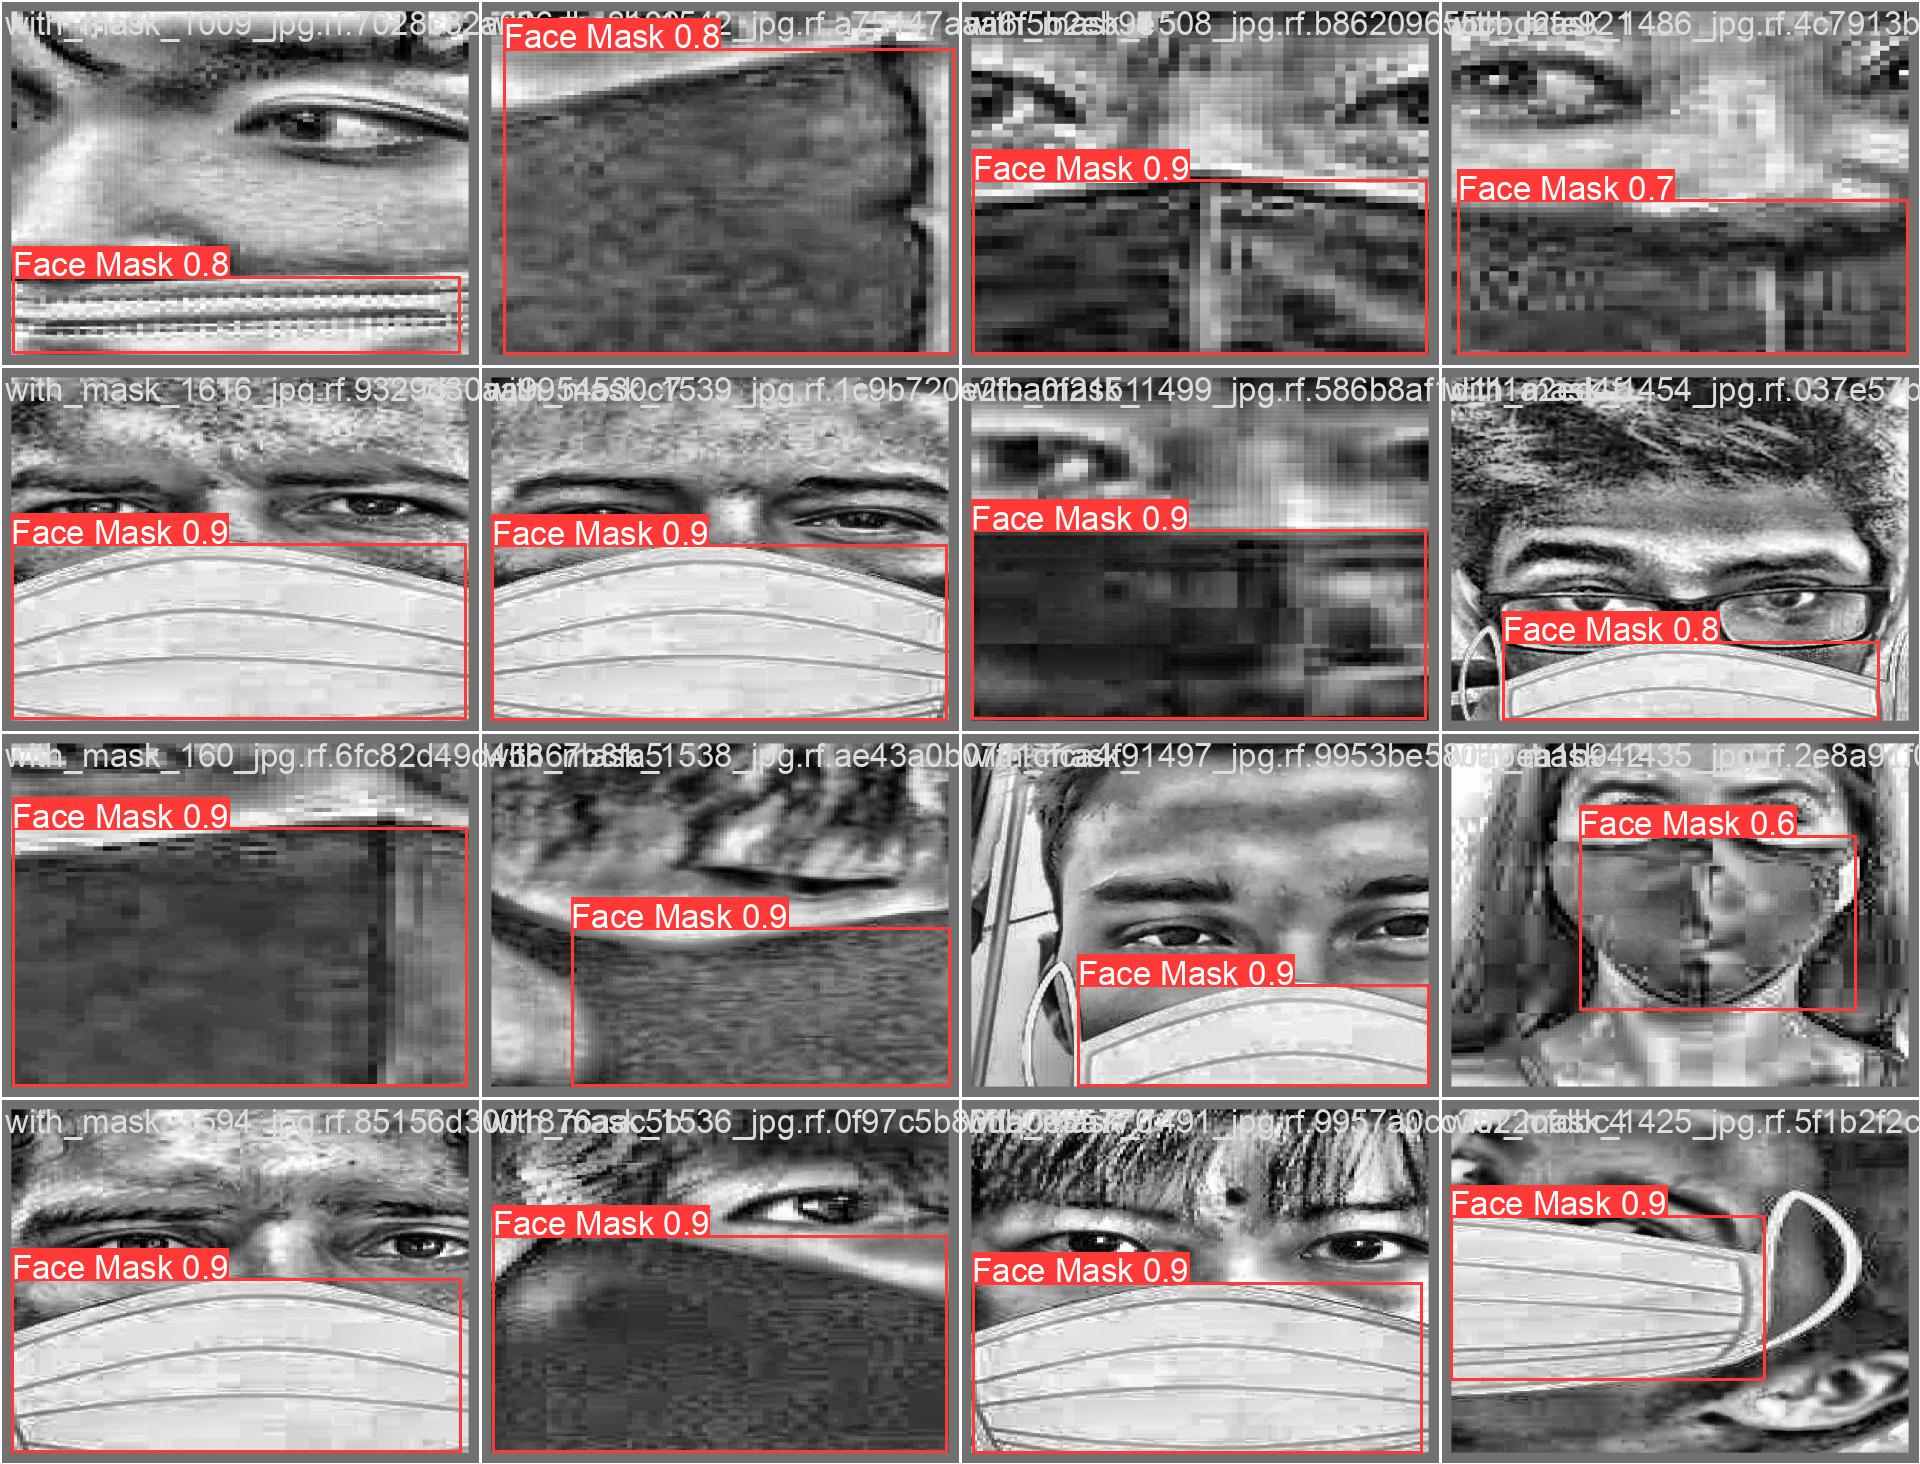

In [ ]:
Image(filename='runs/detect/train4/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Face_Mask/Face_masks/runs/detect/train4/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.183 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Face_Mask/Face_masks/valid/labels.cache... 34 images, 1 backgrounds, 0 corrupt: 100% 34/34 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.38it/s]
                   all         34         34      0.997      0.971      0.977      0.882
Speed: 14.5ms preprocess, 33.1ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Face_Mask/Face_masks/runs/detect/train4/weights/best.pt  conf=0.25 source=/content/drive/MyDrive/Face_Mask/Face_masks/test/images

Ultralytics YOLOv8.0.183 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/27 /content/drive/MyDrive/Face_Mask/Face_masks/test/images/with_mask_1006_jpg.rf.6b7af7812c8bfbf48de6182d50ecf087.jpg: 480x640 1 Face Mask, 60.4ms
image 2/27 /content/drive/MyDrive/Face_Mask/Face_masks/test/images/with_mask_1018_jpg.rf.d65626d1c735d963cfd49f8f29f65a97.jpg: 480x640 1 Face Mask, 13.0ms
image 3/27 /content/drive/MyDrive/Face_Mask/Face_masks/test/images/with_mask_1025_jpg.rf.109f0f106c96ee648c61cc734c8fd8b3.jpg: 480x640 1 Face Mask, 13.0ms
image 4/27 /content/drive/MyDrive/Face_Mask/Face_masks/test/images/with_mask_1064_jpg.rf.e07a93d85211de3a574784aacaa58054.jpg: 480x640 1 Face Mask, 13.0ms
image 5/27 /content/drive/MyDrive/Face_Mask/Face_masks/test/images/with_mask_1117_jpg.rf.070602d3dd7d7f39e07bfd3bd99ccaa7.jpg: 480x640 1 Face Mask, 13.0ms
image 6/27 /content/drive/MyDrive/Face_Mask/Face_masks/test/images/w

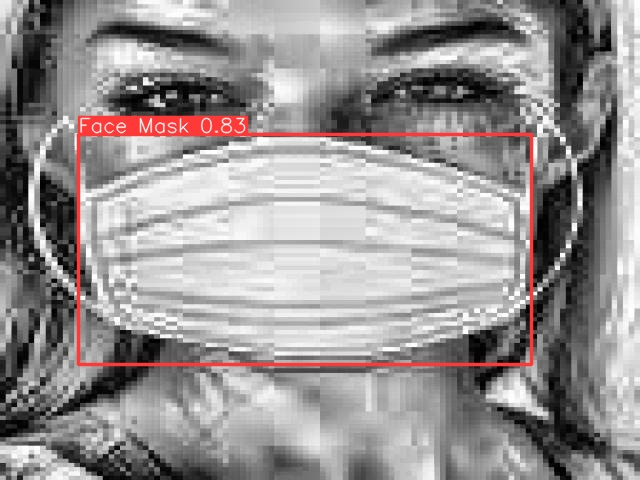

In [ ]:
Image(filename='/content/drive/MyDrive/Face_Mask/Face_masks/runs/detect/predict/with_mask_1018_jpg.rf.d65626d1c735d963cfd49f8f29f65a97.jpg' , width=600)